* **Installing Libraries**

In [58]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

* Downloading the Data

In [59]:
def yfinance_downlowd(Symbol='GC=F',Start="2001-01-01", End="2025-08-01", Interval= "1d"):
  stock = yf.download(tickers=Symbol, start=Start, end=End, interval=Interval)
  drop_level = stock.droplevel('Ticker', axis=1)
  drop_level.columns.name = None
  ds = pd.DataFrame(drop_level)
  ds.index = ds.index.strftime('%d-%m-%Y')
  ds["Close_%"] = ds['Close'].pct_change() * 100

  ds = ds.dropna()

  return ds

In [60]:
ds = yfinance_downlowd()

/tmp/ipython-input-2093831958.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers=Symbol, start=Start, end=End, interval=Interval)
[*********************100%***********************]  1 of 1 completed


In [128]:
ds.head()

,Close,High,Low,Open,Volume,Close_%
Date,,,,,,
03-01-2001,268.000000,268.000000,268.000000,268.000000,1,-0.149029
04-01-2001,267.299988,267.299988,267.299988,267.299988,1,-0.261199
05-01-2001,268.000000,268.000000,268.000000,268.000000,0,0.261883
08-01-2001,268.000000,268.000000,268.000000,268.000000,0,0.000000
09-01-2001,267.500000,267.500000,267.500000,267.500000,0,-0.186567


In [127]:
ds.tail()

,Close,High,Low,Open,Volume,Close_%
Date,,,,,,
25-07-2025,3334.000000,3345.000000,3326.500000,3344.000000,67,-1.097597
28-07-2025,3309.100098,3326.800049,3309.100098,3326.600098,533,-0.746848
29-07-2025,3323.399902,3323.399902,3323.399902,3323.399902,113144,0.432136
30-07-2025,3295.800049,3331.800049,3263.899902,3325.800049,19252,-0.830470
31-07-2025,3293.199951,3312.000000,3272.899902,3272.899902,3704,-0.078891


In [129]:
ds.sample(5)

,Close,High,Low,Open,Volume,Close_%
Date,,,,,,
27-03-2003,328.700012,328.700012,328.700012,328.700012,0,-0.484401
11-09-2024,2512.100098,2525.800049,2502.300049,2525.800049,90,-0.007959
01-10-2009,999.500000,1008.799988,998.000000,1007.400024,213,-0.843254
01-09-2015,1138.699951,1144.699951,1133.500000,1133.500000,375,0.627428
16-08-2021,1786.900024,1787.800049,1771.900024,1776.900024,219,0.659085


In [130]:
ds.shape

(6167, 6)

In [131]:
ds.describe()

,Close,High,Low,Open,Volume,Close_%
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.00000,6167.000000
mean,1219.624598,1225.840182,1213.197681,1219.630290,4354.70861,0.046665
std,641.331214,645.008055,637.391773,641.177022,24389.97515,1.095034
min,255.100006,256.100006,255.000000,255.000000,0.00000,-9.353766
25%,657.049988,659.449982,656.600006,657.900024,23.00000,-0.481148
50%,1247.300049,1253.300049,1241.300049,1247.699951,114.00000,0.049537
75%,1662.000000,1671.000000,1653.250000,1661.750000,431.00000,0.631968
max,3439.199951,3485.600098,3407.300049,3442.000000,386334.00000,9.027685


In [132]:
ds.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0
Close_%,0


* **Plotting the Price Performance**

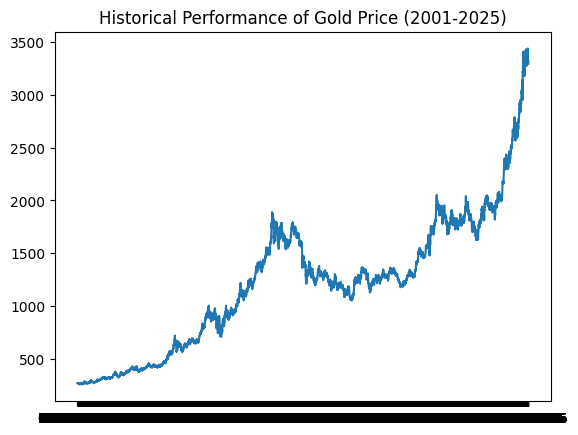

In [16]:
plt.Figure(figsize=(15,9))
plt.plot(ds['Close'])
plt.title("Historical Performance of Gold Price (2001-2025)")

plt.savefig("history.png", bbox_inches= "tight", pad_inches=1)

* **The Features that I will Use in the Model**

In [147]:
ds1 = ds[['Close',"Close_%"]]

In [148]:
ds1

,Close,Close_%
Date,,
03-01-2001,268.000000,-0.149029
04-01-2001,267.299988,-0.261199
05-01-2001,268.000000,0.261883
08-01-2001,268.000000,0.000000
09-01-2001,267.500000,-0.186567
...,...,...
25-07-2025,3334.000000,-1.097597
28-07-2025,3309.100098,-0.746848
29-07-2025,3323.399902,0.432136


* **Scaling & Spliting the Dataset**

In [149]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_ds = scaler.fit_transform(ds1)

In [150]:
scaled_ds[:2]

array([[0.00405138, 0.50076225],
       [0.00383153, 0.49465993]])

In [151]:
n = len(scaled_ds)

features_set = []
labels = []

back_look = 3
predict = 1


for i in range(back_look,n-predict):
  features_set.append(scaled_ds[i-back_look:i,:])
  labels.append(scaled_ds[i:i+predict,0:1])

In [152]:
len(features_set)

6163

In [153]:
train_ratio = 0.6
val_ratio = 0.2

n = len(features_set)

train_index = int(n*train_ratio)
val_index =  int((train_ratio + val_ratio)*n)

train_input = features_set[:train_index]
train_output = labels[:train_index]

val_input = features_set[train_index:val_index]
val_output = labels[train_index:val_index]

test_input = features_set[val_index:]
test_output = labels[val_index:]

In [154]:
train_input = np.array(train_input)
train_output = np.array(train_output)

val_input = np.array(val_input)
val_output = np.array(val_output)

test_input = np.array(test_input)
test_output = np.array(test_output)

In [ ]:
"""
you reshape your data only if the shape is not 3D
"""

#features_set = np.reshape(features_set,(features_set.shape[0],features_set.shape[1],5))
#labels = np.reshape(labels, (labels.shape[0], labels.shape[1],1))

In [155]:
train_input.shape, train_output.shape

((3697, 3, 2), (3697, 1, 1))

In [156]:
test_input.shape, test_output.shape

((1233, 3, 2), (1233, 1, 1))

* **Building the model's Structure**

In [157]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [158]:
train_input.shape[1] * train_input.shape[2]

6

In [159]:
model = Sequential([
    (LSTM(units=100, return_sequences=True,
          input_shape= (train_input.shape[1], train_input.shape[2]))),
    (Dropout(0.5)),
    (LSTM(units=50, return_sequences=True)),
    (Dropout(0.2)),
    (LSTM(units=20)),
    (Dropout(0.2)),

    (Dense(units=1,activation='relu'))
  ])

model.compile(optimizer='adam', loss= 'mean_squared_error',
              metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


* **Training and Evaluating the Model**

* **Training**

In [160]:
# Testing the performance of the model

model.fit(train_input,train_output,epochs=5,batch_size=64)

Epoch 1/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0312 - mae: 0.1404
Epoch 2/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022 - mae: 0.0338
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mae: 0.0263
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - mae: 0.0257
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mae: 0.0234


In [161]:
model.fit(train_input,train_output,epochs=100,batch_size=64)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.4855e-04 - mae: 0.0219
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.1886e-04 - mae: 0.0212
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.3834e-04 - mae: 0.0205
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.7120e-04 - mae: 0.0208
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.5879e-04 - mae: 0.0207
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.5952e-04 - mae: 0.0195
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.3147e-04 - mae: 0.0188
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0519e-04 - mae: 0.0185
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.0932e-04 - mae: 0.0192
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3224e-04 - mae: 0.0176
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.2216e-04 - mae: 0.0176
Epoch 12/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.

* **Validation**

In [162]:
model.fit(val_input,val_output,epochs=100,batch_size=64)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8590e-04 - mae: 0.0145
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5971e-04 - mae: 0.0139
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9226e-04 - mae: 0.0126
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8622e-04 - mae: 0.0124
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3215e-04 - mae: 0.0108
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3986e-04 - mae: 0.0110
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2293e-04 - mae: 0.0104
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7594e-04 - mae: 0.0091
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6143e-04 - mae: 0.0084
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3148e-04 - mae: 0.0078
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2779e-04 - mae: 0.0076
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.

In [163]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 3, 100)         │        41,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 3, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 20)             │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,305 (903.54 KB)

 Trainable params: 77,101 (301.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 154,204 (602.36 KB)

* **Predicting**

In [164]:
pred = model.predict(test_input)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


* **Evaluating the model**

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [166]:
test_output_reshaped = test_output[:, 0, :]

mae = mean_absolute_error(test_output_reshaped, pred)
mse = mean_squared_error(test_output_reshaped, pred)

In [167]:
mae

0.01503790837791695

In [168]:
mse

0.000661057719510004

In [169]:
test_input[:,0,:].shape

(1233, 2)

In [170]:
pred.shape

(1233, 1)

* **Reversing the values**

In [171]:
copy_y_predicted = np.repeat(pred,2,axis=-1)
inv_y_predicted = scaler.inverse_transform(copy_y_predicted)[:,0]

copy_y_actual = np.repeat(test_output,2,axis=-1)
inv_y_actual = scaler.inverse_transform(copy_y_actual[:,0,:])[:,0]

inv_input = scaler.inverse_transform(test_input[:,0,:])

In [172]:
inv_y_predicted

array([1928.3127, 1917.4901, 1909.7543, ..., 3089.3665, 3071.3801,
       3067.7075], dtype=float32)

In [173]:
inv_y_actual

array([1927.59997559, 1923.90002441, 1933.        , ..., 3309.10009766,
       3323.39990234, 3295.80004883])

In [174]:
inv_input.shape

(1233, 2)

* **Plotting**

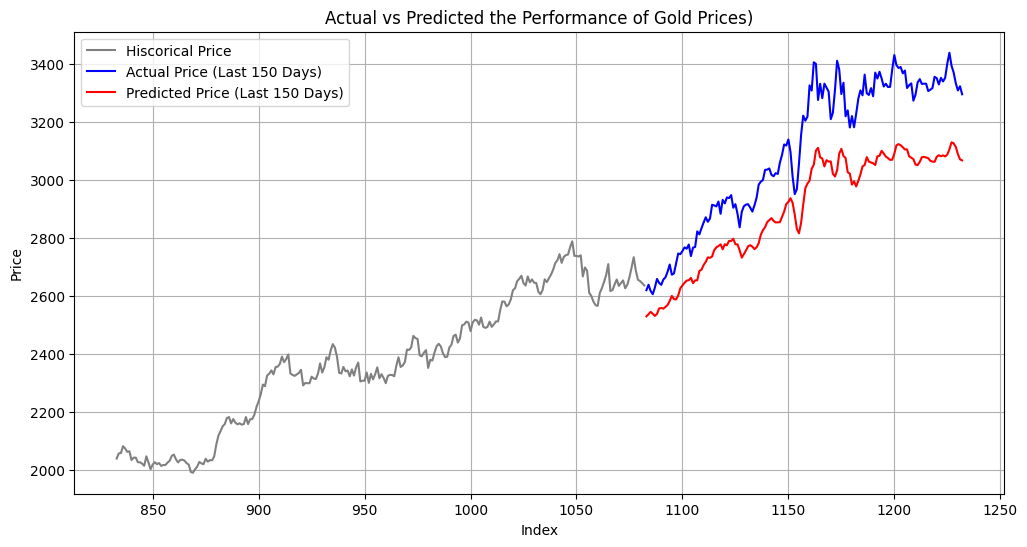

In [177]:
look_back = 150
input_window = 400
space = 0


actual_last100 = inv_y_actual[-look_back:].reshape(-1, 1)
pred_last100 = inv_y_predicted[-look_back:].reshape(-1, 1)


actualPlot = np.empty((len(inv_y_actual), 1))
actualPlot[:] = np.nan
actualPlot[-look_back:] = actual_last100

predPlot = np.empty((len(inv_y_actual), 1))
predPlot[:] = np.nan
predPlot[-look_back:] = pred_last100


input_last600 = inv_input[-input_window:, 0:1].reshape(-1, 1)
inputPlot = np.empty((len(inv_y_actual), 1))
inputPlot[:] = np.nan

inputPlot[-input_window:-(look_back + space)] = input_last600[:-(look_back + space)]


plt.figure(figsize=(12, 6))
plt.plot(inputPlot, label=f"Hiscorical Price", color='gray')
plt.plot(actualPlot, label="Actual Price (Last 150 Days)", color='blue')
plt.plot(predPlot, label="Predicted Price (Last 150 Days)", color='red')

plt.title("Actual vs Predicted the Performance of Gold Prices)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.savefig("Predicting_Price.png", bbox_inches= "tight", pad_inches=1)

* **Saving the Model**

In [182]:
from google.colab import files

# Save the model to Colab runtime environment
model.save('LSTM_Predictor.h5')

In [176]:
# Option two:

model.save('LSTM_Predictor.keras')

In [31]:
# Download the model file to your local device
files.download('LSTM_Predictor.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* **Dowloading The Dataset**

In [181]:
from google.colab import files

ds.to_csv('Final_Dataset.csv', index=True)